In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
im1 = cv2.imread("im1.jpeg",cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread("im2.jpeg", cv2.IMREAD_GRAYSCALE)

In [3]:
sift = cv2.SIFT_create()

In [4]:
kp1, des1 = sift.detectAndCompute(im1,None)
kp2, des2 = sift.detectAndCompute(im2,None)

In [5]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

In [6]:
good = []

for m,n in matches:
    if m.distance/n.distance < 0.75:
        good.append([m])

        

In [7]:
im3 = cv2.drawMatchesKnn(im1,kp1,im2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

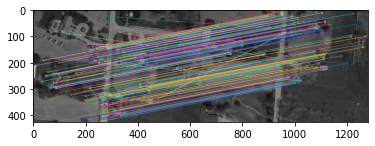

In [8]:
plt.imshow(im3)

In [9]:
#good
for match in good:
    p1 = kp1[match[0].queryIdx].pt
    p2 = kp2[match[0].trainIdx].pt

pts1 = np.array([kp1[m[0].queryIdx].pt for m in good]).reshape(-1,1,2)
pts2 = np.array([kp2[m[0].trainIdx].pt for m in good]).reshape(-1,1,2)

In [10]:
matrix, _ = cv2.findHomography(pts1,pts2, cv2.RANSAC, 5.0)

In [11]:
matrix

array([[ 9.88641710e-01, -1.84667397e-02,  3.21347542e+01],
       [ 1.79579313e-02,  9.82721928e-01, -1.29804893e+02],
       [ 7.75154755e-07, -3.90329318e-05,  1.00000000e+00]])

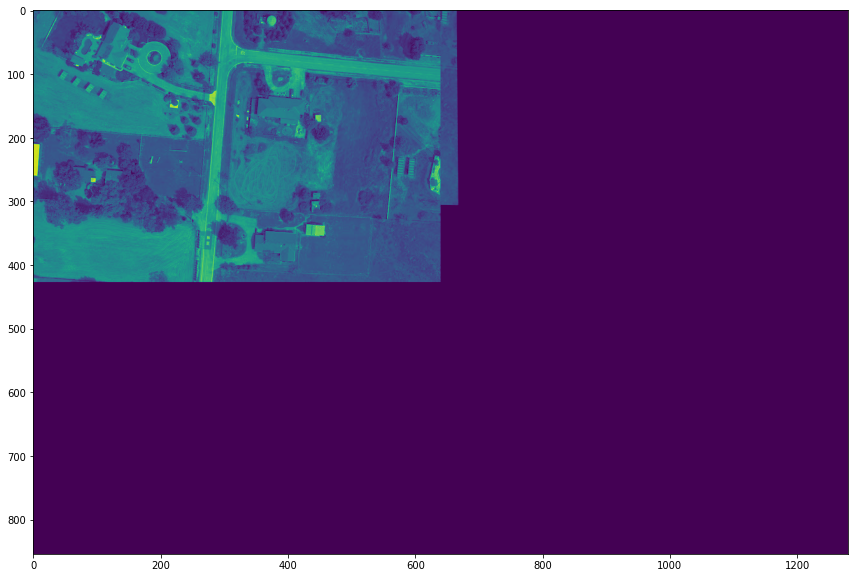

In [16]:
width = im2.shape[1] + im1.shape[1]
height = im2.shape[0] + im1.shape[0]

result = cv2.warpPerspective(im2, matrix, (width, height))
result[0:im1.shape[0], 0:im1.shape[1]] = im1

plt.figure(figsize=(20,10))
plt.imshow(result[:,:])

In [15]:
result.shape

(854, 1280)